In [3]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from IPython.display import SVG
from IPython.display import display
from graphviz import Source

In [5]:
from IPython.display import HTML
style = "<style> svg{width:70% !important; height:70% !important;} </style>"
HTML(style)

In [6]:
titanic_data = pd.read_csv('train.csv')

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [7]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
y = titanic_data['Survived']

In [9]:
X = pd.get_dummies(X)

In [10]:
X = X.fillna({'Age' : X.Age.median()})

In [11]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [15]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [17]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

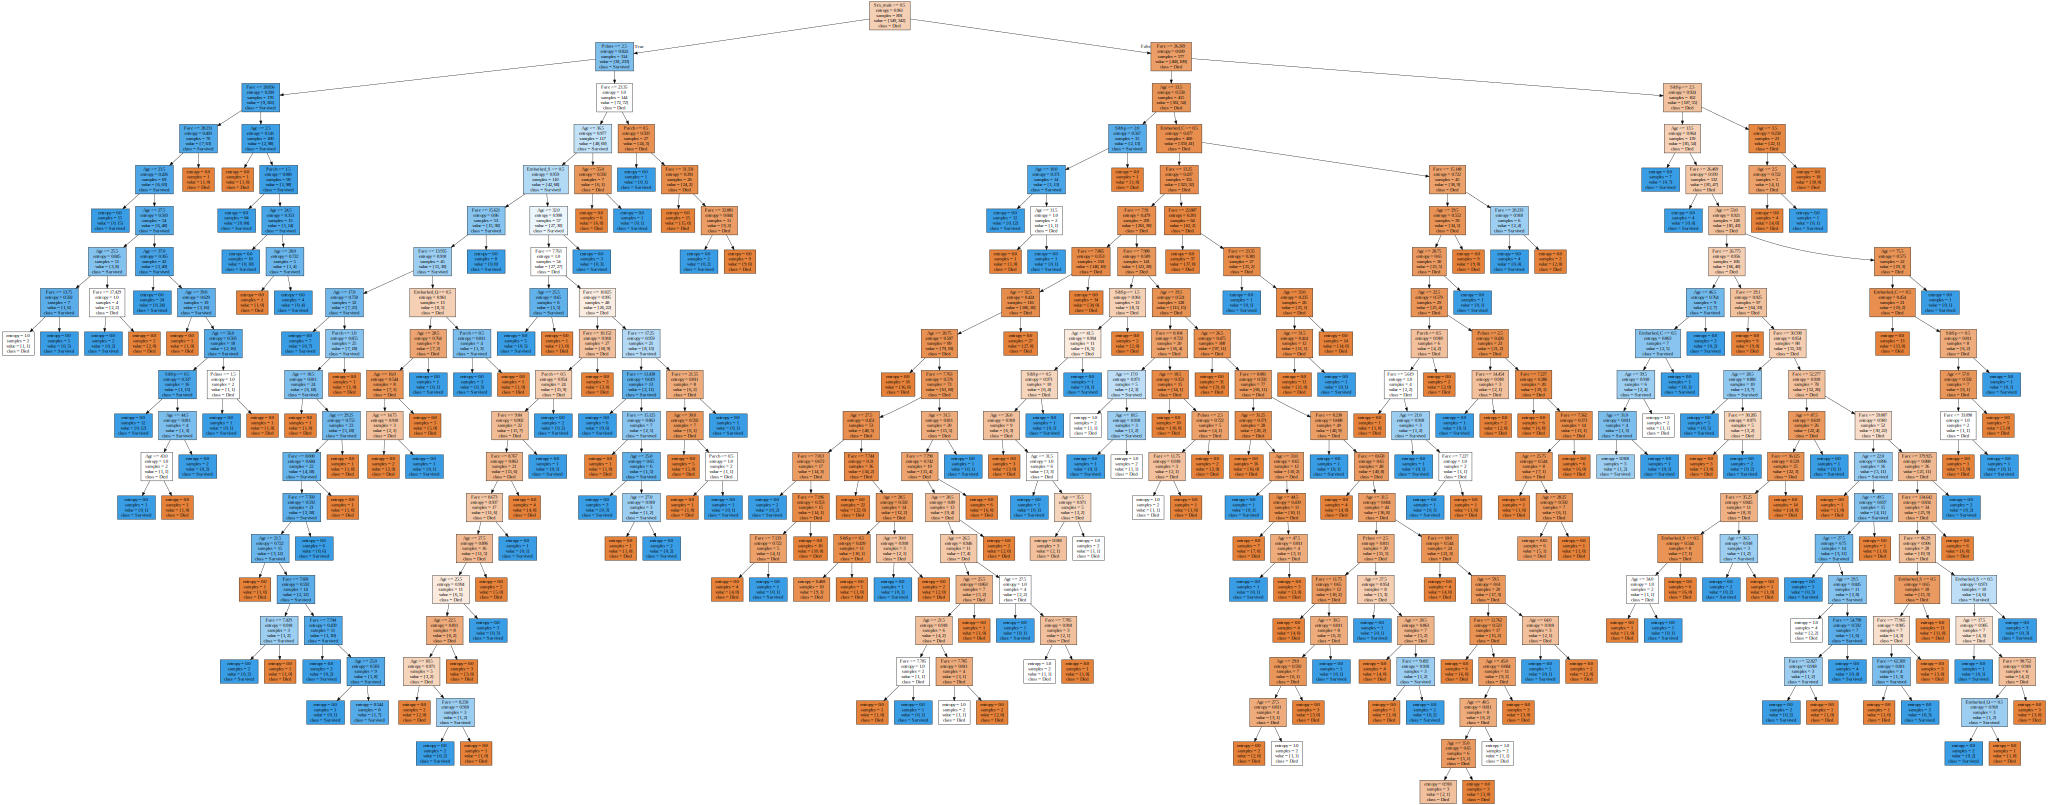

In [18]:
graph = Source(tree.export_graphviz(clf, out_file = None,
                                   feature_names = list(X),
                                   class_names = ['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
clf.score(X, y)

0.9797979797979798

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
clf.score(X_train, y_train)

0.9798657718120806

In [24]:
clf.score(X_test, y_test)

0.7728813559322034

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)

In [26]:
max_depth_values = range(1, 100)

In [27]:
scores_data = pd.DataFrame()

In [28]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [30]:
scores_data.head(20)

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169
0,6,0.867450,0.769492
0,7,0.882550,0.772881
0,8,0.907718,0.793220
0,9,0.917785,0.803390
0,10,0.926174,0.803390


In [31]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score'],
                           var_name = 'set_type', value_name = 'score')

In [33]:
scores_data_long.tail()

,max_depth,set_type,score
193,95,test_score,0.779661
194,96,test_score,0.772881
195,97,test_score,0.772881
196,98,test_score,0.779661
197,99,test_score,0.766102


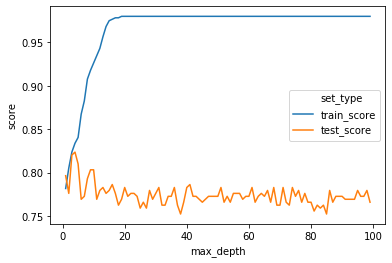

In [36]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)